First, let's import the required libraries and packages

In [245]:
from google.colab import drive
from pathlib import Path
import glob
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import json to view the json data provided
import json

#basic data analysis libraries
import pandas as pd
import numpy as np
from collections import Counter

#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

#Text Libraries

#NLTK
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

#String
import string
from textblob import TextBlob
import re
import spacy

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

#Gensim
import gensim
from gensim import corpora
!pip install pyLDAvis==2.1.2
import pyLDAvis
import pyLDAvis.gensim


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading : Package '' not found in index
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Opening the JSON file using the json library

In [246]:
# Opening the JSON file
json_dir = './data/vestiairecollective'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
df = pd.concat(dfs)
print(len(df))

580


Opening the JSON data using Pandas

In [247]:
#Using Pandas

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
reviewsDF = pd.concat(dfs)
reviewsDF.head(10)

,date,author,text,title,stars,location,url,site
0,2022-05-05,Savinee,Worst customer service! \nI sold my Dior bag w...,"Sold £1,000 bag but not paid by VC",1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
1,2022-05-05,Fanny Ann,THEY THINK THEY CAN IGNORE FOWL TREATMENT BY C...,THEY THINK THEY CAN IGNORE FOWL…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
2,2022-05-05,David,RE: Louis Vuitton leather backpack - item: 223...,RE: REFUND,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
3,2022-05-05,Jess Palmer,Messed up my expert badge and shadow banned i...,"Messed up my expert badge, my account and sha...",1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
4,2022-05-06,shay,I sold an authentic LV belt on this platform 2...,Loss of money and my item...,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
5,2022-05-06,Fumming,Ignorant \nUnresponsive \nTreat seller appalli...,Ignorant,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
6,2022-05-06,Jessica Greenslade,"Order placed for a pair of shoes in a UK 6.5, ...",Scammers,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
7,2022-05-06,Mouj,"I sold a Fendi bag with them, and my buyer has...","Terribe, DO NOT USE THEM",1,CA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
8,2022-05-06,Claire,I was excited to order a vintage mulberry hand...,Counterfeit goods knowingly sold,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
9,2022-05-06,Mas,I have bought from Vestiaire a few times now. ...,BEWARE of FAKES! Authenticity checks are terri...,1,SG,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json


# **Data Cleaning**

Round 1 of cleaning: 

- Converting the text to Lowercase

- Removing text in brackets

- Removing punctuation and words

In [248]:
#Round 1 of cleaning
def clean_text(text):
    # converting to lower
    text = text.lower() 
    #remove text in square brackets
    text = re.sub('\[.*?\]','',text)
    #remove punctuation and remove words
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [249]:
reviewsDF.title = reviewsDF.title.apply(clean_text)
reviewsDF.text = reviewsDF.text.apply(clean_text)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2022-05-05,Savinee,worst customer service \ni sold my dior bag wo...,sold £ bag but not paid by vc,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
1,2022-05-05,Fanny Ann,they think they can ignore fowl treatment by c...,they think they can ignore fowl…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
2,2022-05-05,David,re louis vuitton leather backpack item \n\npu...,re refund,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
3,2022-05-05,Jess Palmer,messed up my expert badge and shadow banned i...,messed up my expert badge my account and shadow…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
4,2022-05-06,shay,i sold an authentic lv belt on this platform ...,loss of money and my item,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json


Round 2 of Cleaning:

- Removing additional punctuation

- Removing non-sensical text

In [250]:
#Round 2 of cleaning
def clean_text2(text):
    '''get rid of some additional punctuation and non-sesical text that was missed the first time'''
    text = re.sub('[''""...]','',text)
    text = re.sub('\n','',text)
    return text

In [251]:
reviewsDF.title = reviewsDF.title.apply(clean_text2)
reviewsDF.text = reviewsDF.text.apply(clean_text2)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2022-05-05,Savinee,worst customer service i sold my dior bag wort...,sold £ bag but not paid by vc,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
1,2022-05-05,Fanny Ann,they think they can ignore fowl treatment by c...,they think they can ignore fowl…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
2,2022-05-05,David,re louis vuitton leather backpack item purcha...,re refund,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
3,2022-05-05,Jess Palmer,messed up my expert badge and shadow banned i...,messed up my expert badge my account and shadow…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
4,2022-05-06,shay,i sold an authentic lv belt on this platform ...,loss of money and my item,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json


Round 3 of Cleaning:

- Punctuation

- Words containing numbers

- Stopwords

- Empty tokens

- Part of Speech Tagging

- Lemmatization

- Removing one letter words

In [252]:
#Round 3 of cleaning (postag, stopwords removal and lemmatization etc)
def get_wordnet_pos(word):
    #Map POS tag to first letter
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
    
def clean_text3(text):
    #tokenizing removing puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #removing words containing numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #removing stopwords
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    #removing empty tokens
    text = [t for t in text if len(t) > 0]
    #part of speech tagging
    pos_tags = pos_tag(text)
    #lemmatizing text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #removing one letter words
    text = [t for t in text if len(t) > 1]
    #joining
    text = " ".join(text)
    return(text)

In [253]:
reviewsDF.title = reviewsDF.title.apply(clean_text3)
reviewsDF.text = reviewsDF.text.apply(clean_text3)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2022-05-05,Savinee,worst customer service sold dior bag worth sen...,sold bag paid vc,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
1,2022-05-05,Fanny Ann,think ignore fowl treatment covering invited” ...,think ignore fowl…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
2,2022-05-05,David,louis vuitton leather backpack item purchased ...,refund,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
3,2022-05-05,Jess Palmer,messed expert badge shadow banned item mistake...,messed expert badge account shadow…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
4,2022-05-06,shay,sold authentic lv belt platform week ago recei...,loss money item,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json


Save the Cleaned data for easy later use

In [254]:
reviewsDF.drop_duplicates(subset='text', keep="last")

#Pickling the DF for later use
reviewsDF.to_pickle("corpus.pkl")

# **Feature Engineering**

Adding new columns for
1. Length
2. Word Count
3. Polarity
4. Sentiment
5. Rating
6. Website

In [255]:
#Let's add a column length, which indicates the length of each text
reviewsDF['length'] = reviewsDF['text'].apply(len)
#Adding a column numOfWords which indicates the number of words in the text
reviewsDF['numOfWords'] = reviewsDF['text'].apply(lambda x: len(x.split(" ")))
#Adding a Polarity column - using TextBlob
reviewsDF['polarity'] = reviewsDF['text'].map(lambda text: TextBlob(text).sentiment.polarity)
#Adding Sentiment Intensity column - using SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
reviewsDF["sentiments"] = reviewsDF["text"].apply(lambda x: sid.polarity_scores(x))
reviewsDF = pd.concat([reviewsDF.drop(['sentiments'], axis=1), reviewsDF['sentiments'].apply(pd.Series)], axis=1)
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound
0,2022-05-05,Savinee,worst customer service sold dior bag worth sen...,sold bag paid vc,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,301,50,-0.273333,0.116,0.849,0.034,-0.6738
1,2022-05-05,Fanny Ann,think ignore fowl treatment covering invited” ...,think ignore fowl…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,221,28,-0.500000,0.375,0.566,0.059,-0.9062
2,2022-05-05,David,louis vuitton leather backpack item purchased ...,refund,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,604,84,0.071429,0.000,0.899,0.101,0.7906
3,2022-05-05,Jess Palmer,messed expert badge shadow banned item mistake...,messed expert badge account shadow…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,328,46,-0.365000,0.371,0.486,0.142,-0.9387
4,2022-05-06,shay,sold authentic lv belt platform week ago recei...,loss money item,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,228,34,0.200000,0.231,0.769,0.000,-0.7906


In [256]:
#Adding a Sentiment column depending on the calculated compound score
reviewsDF['Sentiment'] = reviewsDF['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
reviewsDF.Sentiment.value_counts()

neg    319
pos    261
Name: Sentiment, dtype: int64

In [257]:
#Adding a column (numeric) for rating
#reviewsDF.stars.value_counts()
reviewsDF['rating'] = reviewsDF['stars']
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating
0,2022-05-05,Savinee,worst customer service sold dior bag worth sen...,sold bag paid vc,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,301,50,-0.273333,0.116,0.849,0.034,-0.6738,neg,1
1,2022-05-05,Fanny Ann,think ignore fowl treatment covering invited” ...,think ignore fowl…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,221,28,-0.500000,0.375,0.566,0.059,-0.9062,neg,1
2,2022-05-05,David,louis vuitton leather backpack item purchased ...,refund,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,604,84,0.071429,0.000,0.899,0.101,0.7906,pos,1
3,2022-05-05,Jess Palmer,messed expert badge shadow banned item mistake...,messed expert badge account shadow…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,328,46,-0.365000,0.371,0.486,0.142,-0.9387,neg,1
4,2022-05-06,shay,sold authentic lv belt platform week ago recei...,loss money item,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,228,34,0.200000,0.231,0.769,0.000,-0.7906,neg,1


In [258]:
#Analyzing URL column
reviewsDF.url.str.split("review/")[0]
reviewsDF['Site'] = reviewsDF.url.apply(lambda x: x.split("review/")[1])
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site
0,2022-05-05,Savinee,worst customer service sold dior bag worth sen...,sold bag paid vc,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,301,50,-0.273333,0.116,0.849,0.034,-0.6738,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...
1,2022-05-05,Fanny Ann,think ignore fowl treatment covering invited” ...,think ignore fowl…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,221,28,-0.500000,0.375,0.566,0.059,-0.9062,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...
2,2022-05-05,David,louis vuitton leather backpack item purchased ...,refund,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,604,84,0.071429,0.000,0.899,0.101,0.7906,pos,1,vestiairecollective.com?stars=1&stars=2&stars=...
3,2022-05-05,Jess Palmer,messed expert badge shadow banned item mistake...,messed expert badge account shadow…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,328,46,-0.365000,0.371,0.486,0.142,-0.9387,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...
4,2022-05-06,shay,sold authentic lv belt platform week ago recei...,loss money item,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,228,34,0.200000,0.231,0.769,0.000,-0.7906,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...


In [259]:
reviewsDF.Site.value_counts()

vestiairecollective.com?stars=1&stars=2&stars=3?page=15    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=27    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=16    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=20    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=8     20
vestiairecollective.com?stars=1&stars=2&stars=3?page=9     20
vestiairecollective.com?stars=1&stars=2&stars=3?page=21    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=17    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=5     20
vestiairecollective.com?stars=1&stars=2&stars=3?page=26    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=2     20
vestiairecollective.com?stars=1&stars=2&stars=3?page=10    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=11    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=3     20
vestiairecollective.com?stars=1&stars=2&stars=3?page=24    20
vestiairecollective.com?stars=1&stars=2&stars=3?page=7     20
vestiair

# **EDA**

Exploratory Data Analysis

In [260]:
#This function is used to see mathematical metrics of all the columns 
reviewsDF.describe()

,stars,length,numOfWords,polarity,neg,neu,pos,compound,rating
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.00000,580.000000,580.000000
mean,1.100000,344.800000,48.800000,0.032050,0.157700,0.723600,0.11870,-0.175930,1.100000
std,0.436266,175.901128,24.789504,0.229899,0.100729,0.118155,0.07424,0.647744,0.436266
min,1.000000,80.000000,14.000000,-0.500000,0.000000,0.473000,0.00000,-0.938700,1.000000
25%,1.000000,226.250000,31.750000,-0.091613,0.095000,0.659500,0.08200,-0.774625,1.000000
50%,1.000000,314.500000,48.000000,0.059048,0.135000,0.760500,0.11050,-0.304350,1.000000
75%,1.000000,404.500000,58.500000,0.185937,0.223000,0.799250,0.13975,0.381000,1.000000
max,3.000000,767.000000,114.000000,0.500000,0.375000,0.899000,0.27700,0.923100,3.000000


In [261]:
#To see the type of each column and check if there are any null values 
reviewsDF.date = pd.to_datetime(reviewsDF['date'])

reviewsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 19
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        580 non-null    datetime64[ns]
 1   author      580 non-null    object        
 2   text        580 non-null    object        
 3   title       580 non-null    object        
 4   stars       580 non-null    int64         
 5   location    580 non-null    object        
 6   url         580 non-null    object        
 7   site        580 non-null    object        
 8   length      580 non-null    int64         
 9   numOfWords  580 non-null    int64         
 10  polarity    580 non-null    float64       
 11  neg         580 non-null    float64       
 12  neu         580 non-null    float64       
 13  pos         580 non-null    float64       
 14  compound    580 non-null    float64       
 15  Sentiment   580 non-null    object        
 16  rating      580 non-null   

In [262]:
#To count number of samples for each rating
reviewsDF.rating.value_counts()

1    551
3     29
Name: rating, dtype: int64

<AxesSubplot:>

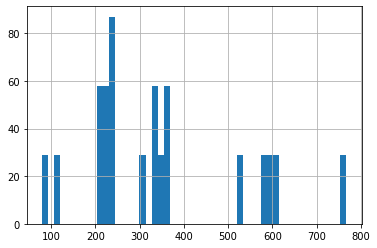

In [263]:
# Review length distribution
reviewsDF['length'].hist(bins=50)

array([<AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'3'}>], dtype=object)

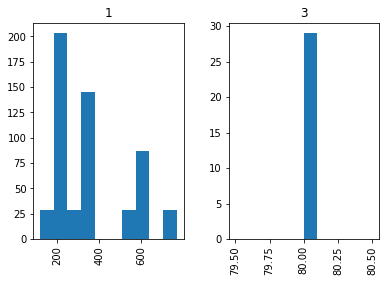

In [264]:
#Histogram plot to see the lenght of each rating
reviewsDF.hist(column = 'length', by = 'rating')

In [265]:
#Histogram plot to analyze number of reviews with respect to date
#As we can see, 2018 has many reviews comapared to other years
fig = px.histogram(reviewsDF, x='date', title='Reviews by date')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

In [266]:
#Histogram plot to analyze number of reviews with respect to date and ratings
#As we can see there are many one star ratings compared to all other ratings 
fig = px.histogram(reviewsDF, x='date',  title='Reviews by date', color='rating', nbins=10, log_y=True, barmode='group')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

<AxesSubplot:>

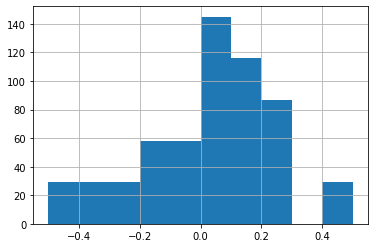

In [267]:
#Histogram plot for polarity, and by observing we say that there are many reviwes with the polarity between 0 to 0.25
reviewsDF.polarity.hist()

<AxesSubplot:>

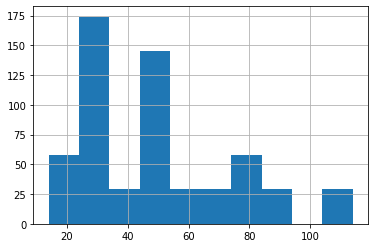

In [268]:
#Plot to analyze number of words
reviewsDF['numOfWords'].hist()

In [269]:
#top positive reviews
reviewsDF.sort_values("pos", ascending = False)[["text", "pos"]].head(20)

,text,pos
10,ignorant unresponsive treat seller appalling u...,0.277
5,ignorant unresponsive treat seller appalling u...,0.277
11,ignorant unresponsive treat seller appalling u...,0.277
10,ignorant unresponsive treat seller appalling u...,0.277
4,ignorant unresponsive treat seller appalling u...,0.277
5,ignorant unresponsive treat seller appalling u...,0.277
11,ignorant unresponsive treat seller appalling u...,0.277
5,ignorant unresponsive treat seller appalling u...,0.277
11,ignorant unresponsive treat seller appalling u...,0.277
8,ignorant unresponsive treat seller appalling u...,0.277


In [270]:
#Analyzing the negative data - ascending order 
reviewsDF.sort_values("neg", ascending = False)[["text", "pos"]].head(20)

,text,pos
2,think ignore fowl treatment covering invited” ...,0.059
3,think ignore fowl treatment covering invited” ...,0.059
1,think ignore fowl treatment covering invited” ...,0.059
3,think ignore fowl treatment covering invited” ...,0.059
2,think ignore fowl treatment covering invited” ...,0.059
2,think ignore fowl treatment covering invited” ...,0.059
1,think ignore fowl treatment covering invited” ...,0.059
2,think ignore fowl treatment covering invited” ...,0.059
1,think ignore fowl treatment covering invited” ...,0.059
2,think ignore fowl treatment covering invited” ...,0.059


In [271]:
reviewsDF['length'][1234]

KeyError: 1234

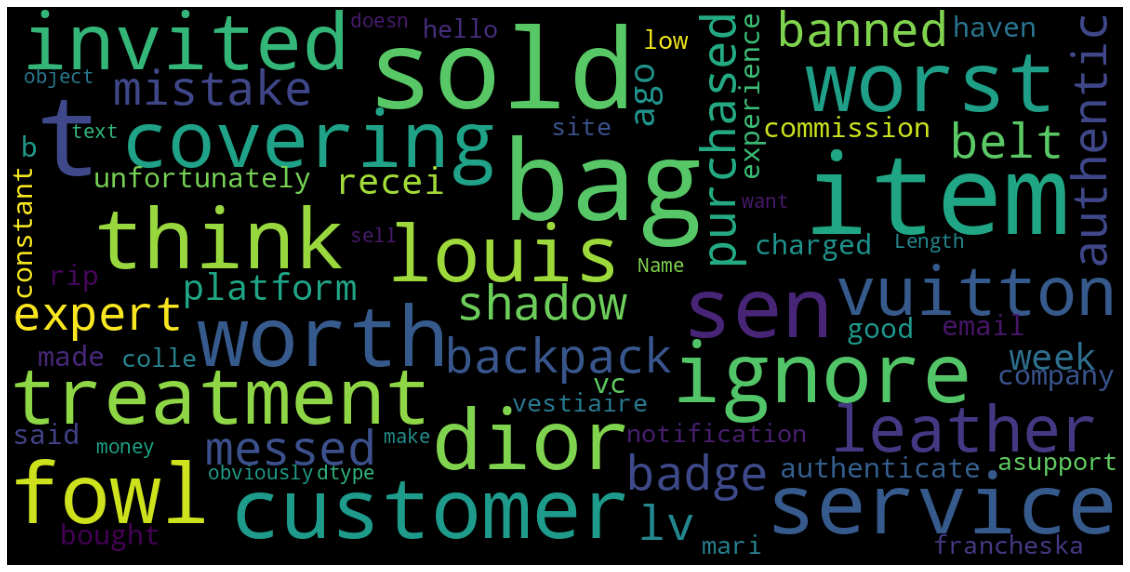

In [ ]:
#WordCloud of text in the complete data set
wordcloud = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
#Percentage of each word in the wordcloud
wordcloud.words_

{'sold': 1.0,
 'bag': 1.0,
 'item': 1.0,
 't': 1.0,
 'worst': 0.5,
 'customer': 0.5,
 'service': 0.5,
 'dior': 0.5,
 'worth': 0.5,
 'sen': 0.5,
 'think': 0.5,
 'ignore': 0.5,
 'fowl': 0.5,
 'treatment': 0.5,
 'covering': 0.5,
 'invited': 0.5,
 'louis': 0.5,
 'vuitton': 0.5,
 'leather': 0.5,
 'backpack': 0.5,
 'purchased': 0.5,
 'messed': 0.5,
 'expert': 0.5,
 'badge': 0.5,
 'shadow': 0.5,
 'banned': 0.5,
 'mistake': 0.5,
 'authentic': 0.5,
 'lv': 0.5,
 'belt': 0.5,
 'platform': 0.5,
 'week': 0.5,
 'ago': 0.5,
 'recei': 0.5,
 'unfortunately': 0.5,
 'haven': 0.5,
 'good': 0.5,
 'experience': 0.5,
 'vc': 0.5,
 'made': 0.5,
 'bought': 0.5,
 'company': 0.5,
 'charged': 0.5,
 'authenticate': 0.5,
 'said': 0.5,
 'b': 0.5,
 'commission': 0.5,
 'rip': 0.5,
 'constant': 0.5,
 'email': 0.5,
 'notification': 0.5,
 'low': 0.5,
 'hello': 0.5,
 'francheska': 0.5,
 'mari': 0.5,
 'asupport': 0.5,
 'vestiaire': 0.5,
 'colle': 0.5,
 'site': 0.5,
 'obviously': 0.5,
 'doesn': 0.5,
 'want': 0.5,
 'sell': 0.

# **Topic Modelling**

In [ ]:
reviewData = reviewsDF['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)

In [ ]:
#Let's consider the top 20 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [ ]:
def getCategoriesCounts(lsa_topic_matrix):
  keys = lsa_topic_matrix.argmax(axis=1).tolist()
  count_pairs = Counter(keys).items()
  categories = [pair[0] for pair in count_pairs]
  counts = [pair[1] for pair in count_pairs]
  return (keys,categories, counts)

In [ ]:
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)

In [ ]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [ ]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  bag company said
Topic 2:  refund receive management
Topic 3:  commission fee work
Topic 4:  avoid buyer vestiaire
Topic 5:  ignore malpracticewe mistreating
Topic 6:  like hate hold
Topic 7:  site package person
Topic 8:  fact issue repetitively
Topic 9:  authenticity immediately lot
Topic 10:  good unhelpful avoidrebelle


We can see the top 20 topics in the whole dataset

Now let's compare the topics year by year

In [ ]:
reviewsDF.date.describe()

count                     400
unique                      4
top       2022-05-06 00:00:00
freq                      180
first     2022-05-05 00:00:00
last      2022-05-08 00:00:00
Name: date, dtype: object

In [ ]:
reviewsDF.date.dt.year.value_counts() #to know the years of the available data

2022    400
Name: date, dtype: int64

In [ ]:
#subset the full dataset into yearly dataframes
reviewsDF2011 = reviewsDF[reviewsDF.date.dt.year==2022]
reviewsDF2015 = reviewsDF[reviewsDF.date.dt.year==2022]
reviewsDF2016 = reviewsDF[reviewsDF.date.dt.year==2022]
reviewsDF2017 = reviewsDF[reviewsDF.date.dt.year==2022]
reviewsDF2018 = reviewsDF[reviewsDF.date.dt.year==2022]

Let's perform LSA to understand the topics for each year

In [ ]:
#2011
reviewData = reviewsDF2011['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 2 topics
n_topics = 2
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2011 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  bag company customer
Topic 2:  commission issue item


In [ ]:
#2015
reviewData = reviewsDF2015['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 14 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2015 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  bag company said
Topic 2:  refund receive management
Topic 3:  commission fee work
Topic 4:  avoid buyer vestiaire
Topic 5:  ignore malpracticewe mistreating
Topic 6:  like hate hold
Topic 7:  site package person
Topic 8:  fact issue repetitively
Topic 9:  authenticity immediately lot
Topic 10:  good unhelpful avoidrebelle


In [ ]:
#2016
reviewData = reviewsDF2016['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 15 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2016 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  bag company said
Topic 2:  refund receive management
Topic 3:  commission fee work
Topic 4:  avoid buyer vestiaire
Topic 5:  ignore malpracticewe mistreating
Topic 6:  like hate hold
Topic 7:  site package person
Topic 8:  fact issue repetitively
Topic 9:  authenticity immediately lot
Topic 10:  good unhelpful avoidrebelle


In [ ]:
#2017
reviewData = reviewsDF2017['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 34 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2017 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  bag company said
Topic 2:  refund receive management
Topic 3:  commission fee work
Topic 4:  avoid buyer vestiaire
Topic 5:  ignore malpracticewe mistreating
Topic 6:  like hate hold
Topic 7:  site package person
Topic 8:  fact issue repetitively
Topic 9:  authenticity immediately lot
Topic 10:  good unhelpful avoidrebelle


In [ ]:
#2018
reviewData = reviewsDF2018['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 12 topics
n_topics = 12
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2018 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  bag company told
Topic 2:  refund receive management
Topic 3:  commission fee work
Topic 4:  avoid buyer vestiaire
Topic 5:  ignore malpracticewe mistreating
Topic 6:  like hate hold
Topic 7:  person actual package
Topic 8:  fact issue repetitively
Topic 9:  authenticity immediately lot
Topic 10:  good enjoy unresponsive
Topic 11:  site based buy
Topic 12:  handbag authentication noticed


Visualizing the word cloud for each year to understand the most common words

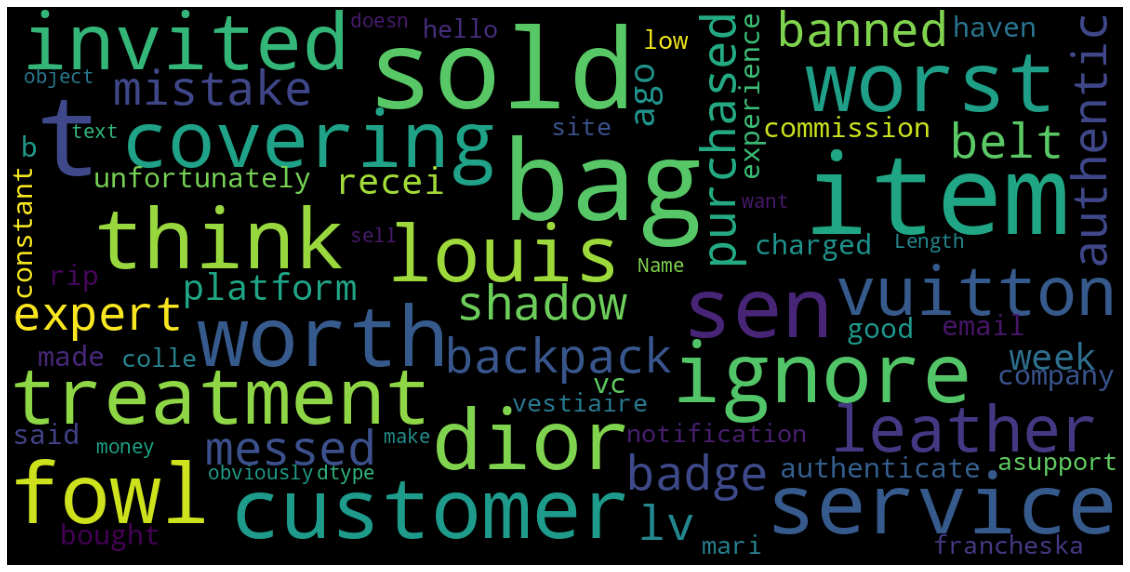

In [ ]:
#2011
wordcloud2011 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2011['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2011)
plt.show()

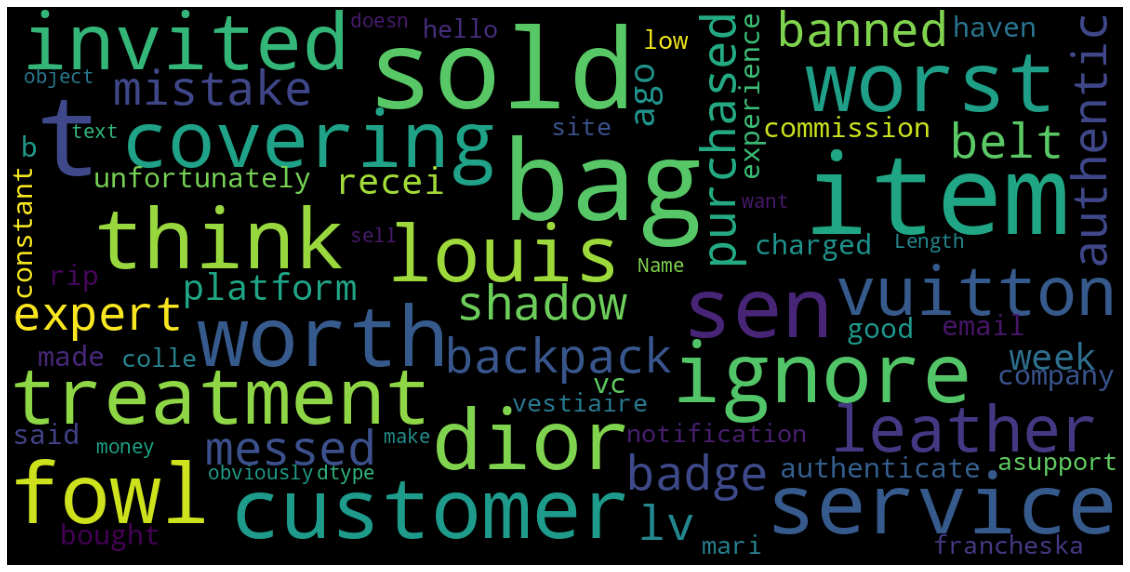

In [ ]:
#2015
wordcloud2015 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2015['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2015)
plt.show()

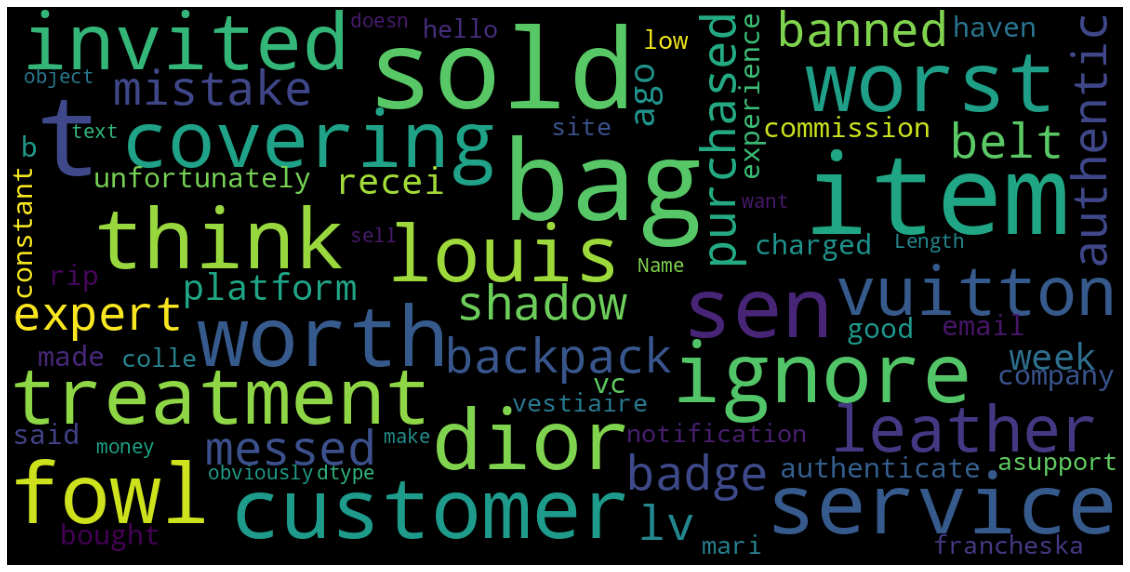

In [ ]:
#2016
wordcloud2016 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2016['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2016)
plt.show()

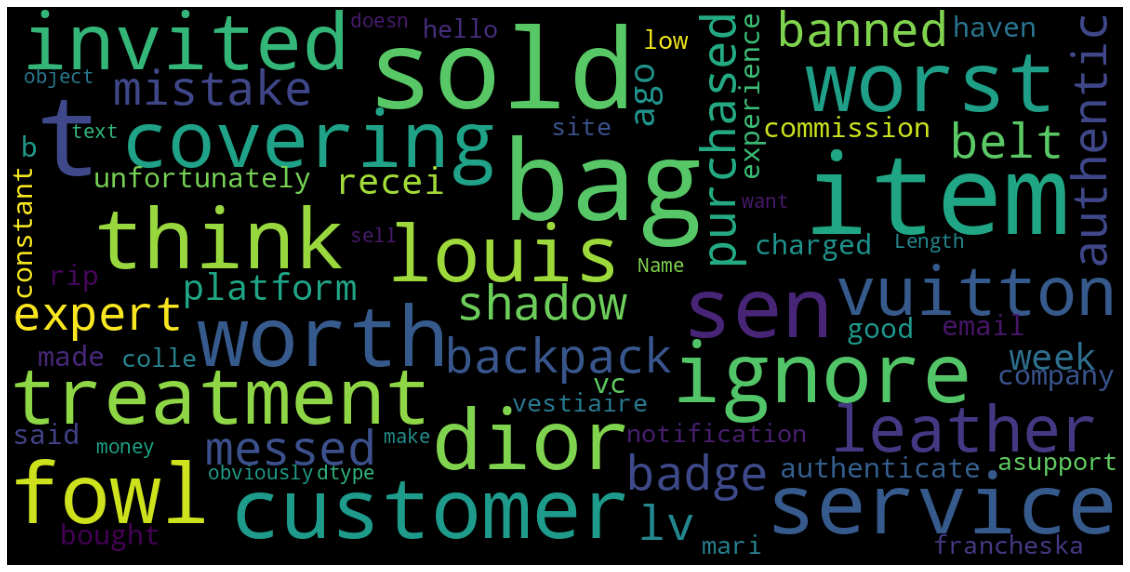

In [ ]:
#2017
wordcloud2017 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2017['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2017)
plt.show()

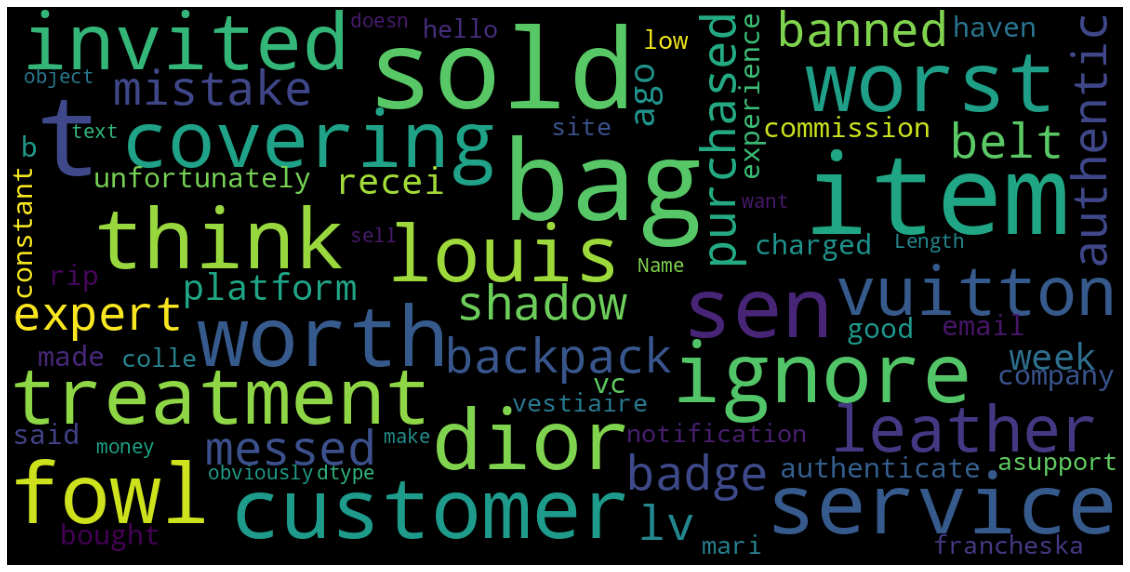

In [ ]:
#2018
wordcloud2018 = WordCloud(max_words = 200, max_font_size = 40, scale = 3, random_state = 42).generate(str(reviewsDF2018['text']))
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2018)
plt.show()

In [ ]:
#Let's create a df with the top topics for all the years
l1,l5,l6,l7,l8=len(top_2011),len(top_2015),len(top_2016),len(top_2017),len(top_2018)
max_len = max(l1,l5,l6,l7,l8)

if not max_len == l1:
  top_2011.extend(['-']*(max_len-l1))
if not max_len == l5:
  top_2015.extend(['-']*(max_len-l5))
if not max_len == l6:
  top_2016.extend(['-']*(max_len-l6))
if not max_len == l7:
  top_2017.extend(['-']*(max_len-l7))
if not max_len == l8:
  top_2018.extend(['-']*(max_len-l8))

topicsDF = pd.DataFrame({'2011':top_2011,'2015':top_2015,'2016':top_2016,'2017':top_2017,'2018':top_2018})
topicsDF

,2011,2015,2016,2017,2018
0,bag company customer,bag company said,bag company said,bag company said,bag company told
1,commission issue item,refund receive management,refund receive management,refund receive management,refund receive management
2,-,commission fee work,commission fee work,commission fee work,commission fee work
3,-,avoid buyer vestiaire,avoid buyer vestiaire,avoid buyer vestiaire,avoid buyer vestiaire
4,-,ignore malpracticewe mistreating,ignore malpracticewe mistreating,ignore malpracticewe mistreating,ignore malpracticewe mistreating
5,-,like hate hold,like hate hold,like hate hold,like hate hold
6,-,site package person,site package person,site package person,person actual package
7,-,fact issue repetitively,fact issue repetitively,fact issue repetitively,fact issue repetitively
8,-,authenticity immediately lot,authenticity immediately lot,authenticity immediately lot,authenticity immediately lot
9,-,good unhelpful avoidrebelle,good unhelpful avoidrebelle,good unhelpful avoidrebelle,good enjoy unresponsive


Even though we have the top topics for each year, it is difficult to infer how the trend has changed over the years!  

In [ ]:
reviewsDF

,date,author,text,title,stars,location,url,site,length,numOfWords,...,neu,pos,compound,Sentiment,rating,Site,neg,neu,pos,compound
0,2022-05-05,Savinee,worst customer service sold dior bag worth sen...,sold bag paid vc,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,301,50,...,0.849,0.034,-0.6738,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.116,0.849,0.034,-0.6738
1,2022-05-05,Fanny Ann,think ignore fowl treatment covering invited” ...,think ignore fowl…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,221,28,...,0.615,0.052,-0.9062,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.375,0.566,0.059,-0.9062
2,2022-05-05,David,louis vuitton leather backpack item purchased ...,refund,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,604,84,...,0.900,0.100,0.7906,pos,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.000,0.899,0.101,0.7906
3,2022-05-05,Jess Palmer,messed expert badge shadow banned item mistake...,messed expert badge account shadow…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,328,46,...,0.464,0.132,-0.9634,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.371,0.486,0.142,-0.9387
4,2022-05-06,shay,sold authentic lv belt platform week ago recei...,loss money item,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,228,34,...,0.728,0.000,-0.8481,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.231,0.769,0.000,-0.7906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2022-05-07,Olivia,unfortunately haven’t good experience vc made ...,poor customer service,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,365,53,...,0.690,0.089,-0.7693,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.222,0.690,0.089,-0.7693
16,2022-05-07,Mariam Choksy,bought bag company charged authenticate said b...,bought bag company,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,238,33,...,0.798,0.000,-0.7650,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.202,0.798,0.000,-0.7650
17,2022-05-08,Egle Vilunaite,commission rip constant email notification low...,commission rip,1,NL,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,234,33,...,0.719,0.163,0.4404,pos,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.120,0.713,0.167,0.4404
18,2022-05-08,David,hello francheska mari asupport vestiaire colle...,hello francheska mari,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,590,72,...,0.603,0.161,-0.7351,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.226,0.661,0.113,-0.8481


As the number of reviews in 2011 is very less, lets plot the polarity for the remaining years in terms of time

<AxesSubplot:title={'center':'2018'}, xlabel='date'>

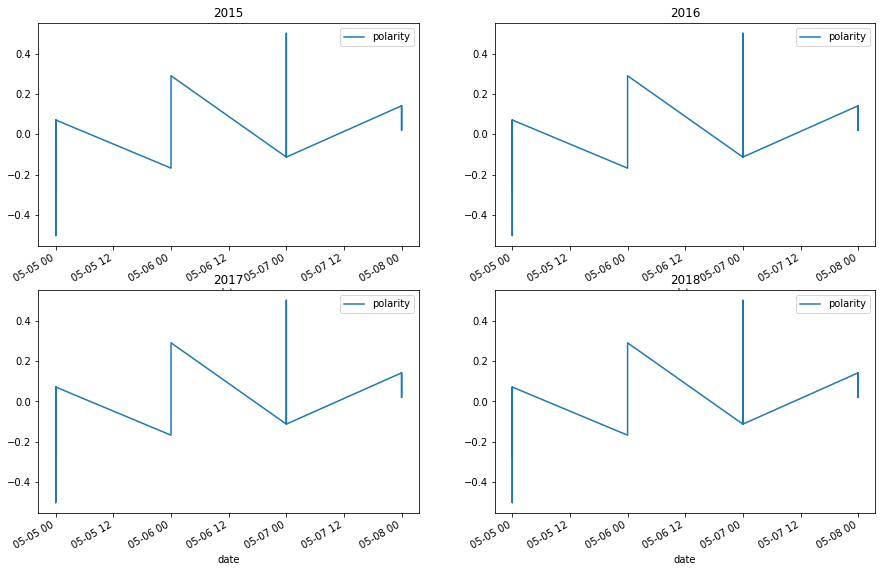

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
#reviewsDF2011.plot.line(x='date',y='polarity',ax=axes[0,0])
reviewsDF2015.plot.line(x='date',y='polarity',ax=axes[0,0],title='2015')
reviewsDF2016.plot.line(x='date',y='polarity',ax=axes[0,1],title='2016')
reviewsDF2017.plot.line(x='date',y='polarity',ax=axes[1,0],title='2017')
reviewsDF2018.plot.line(x='date',y='polarity',ax=axes[1,1],title='2018')

In [ ]:
#Let's create a DF with the total number of positive and negative reviews detected for each year
sentimentDF = pd.DataFrame(0,range(5),columns=['Year','pos','neg'])
sentimentDF

,Year,pos,neg
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
sentimentDF.loc[0] = [2011,reviewsDF2011.Sentiment.value_counts()['pos'],reviewsDF2011.Sentiment.value_counts()['neg']]
sentimentDF.loc[1] = [2015,reviewsDF2015.Sentiment.value_counts()['pos'],reviewsDF2015.Sentiment.value_counts()['neg']]
sentimentDF.loc[2] = [2016,reviewsDF2016.Sentiment.value_counts()['pos'],reviewsDF2016.Sentiment.value_counts()['neg']]
sentimentDF.loc[3] = [2017,reviewsDF2017.Sentiment.value_counts()['pos'],reviewsDF2017.Sentiment.value_counts()['neg']]
sentimentDF.loc[4] = [2018,reviewsDF2018.Sentiment.value_counts()['pos'],reviewsDF2018.Sentiment.value_counts()['neg']]

In [ ]:
sentimentDF

,Year,pos,neg
0,2011,160,240
1,2015,160,240
2,2016,160,240
3,2017,160,240
4,2018,160,240


<AxesSubplot:xlabel='Year'>

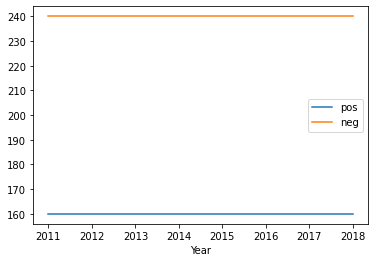

In [ ]:
#Plot of positive vs negative reviews over the years
sentimentDF.plot.line(x='Year')

# **LDA & Topic trend**

Now, even though the LSA provided the topics, let's analyze the topics using LDA in order to analyze the trend and to better visualize the topics 

In [ ]:
df = reviewsDF
df

,date,author,text,title,stars,location,url,site,length,numOfWords,...,neu,pos,compound,Sentiment,rating,Site,neg,neu,pos,compound
0,2022-05-05,Savinee,worst customer service sold dior bag worth sen...,sold bag paid vc,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,301,50,...,0.849,0.034,-0.6738,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.116,0.849,0.034,-0.6738
1,2022-05-05,Fanny Ann,think ignore fowl treatment covering invited” ...,think ignore fowl…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,221,28,...,0.615,0.052,-0.9062,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.375,0.566,0.059,-0.9062
2,2022-05-05,David,louis vuitton leather backpack item purchased ...,refund,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,604,84,...,0.900,0.100,0.7906,pos,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.000,0.899,0.101,0.7906
3,2022-05-05,Jess Palmer,messed expert badge shadow banned item mistake...,messed expert badge account shadow…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,328,46,...,0.464,0.132,-0.9634,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.371,0.486,0.142,-0.9387
4,2022-05-06,shay,sold authentic lv belt platform week ago recei...,loss money item,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,228,34,...,0.728,0.000,-0.8481,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.231,0.769,0.000,-0.7906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2022-05-07,Olivia,unfortunately haven’t good experience vc made ...,poor customer service,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,365,53,...,0.690,0.089,-0.7693,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.222,0.690,0.089,-0.7693
16,2022-05-07,Mariam Choksy,bought bag company charged authenticate said b...,bought bag company,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,238,33,...,0.798,0.000,-0.7650,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.202,0.798,0.000,-0.7650
17,2022-05-08,Egle Vilunaite,commission rip constant email notification low...,commission rip,1,NL,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,234,33,...,0.719,0.163,0.4404,pos,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.120,0.713,0.167,0.4404
18,2022-05-08,David,hello francheska mari asupport vestiaire colle...,hello francheska mari,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,590,72,...,0.603,0.161,-0.7351,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.226,0.661,0.113,-0.8481


In [ ]:
warnings.filterwarnings('ignore')

reviews = list(df['text'])
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
reviews = pd.Series(reviews).apply(lambda x: x.split())
r1 = []
for wrd in reviews:
  doc = nlp(" ".join(wrd))
  r1.append([token.lemma_ for token in doc if token.pos_ in ['NOUN','ADJ']])

reviewsR1 = r1

In [ ]:
#LDA
dictionary = corpora.Dictionary(reviewsR1)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviewsR1]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=42,chunksize=1000, passes=50)

In [ ]:
#The top 20 topics that the LDA model has learned are
lda_model.print_topics()

[(0,
  '0.072*"package" + 0.072*"person" + 0.072*"terrible" + 0.072*"experience" + 0.072*"return" + 0.072*"watch" + 0.072*"actual" + 0.036*"email" + 0.036*"frustrating" + 0.036*"empty"'),
 (1,
  '0.068*"leather" + 0.068*"last" + 0.068*"lot" + 0.068*"item" + 0.068*"picture" + 0.068*"perfect" + 0.068*"feedback" + 0.068*"necessary" + 0.068*"quality" + 0.068*"wednesdaysaw"'),
 (2,
  '0.004*"item" + 0.004*"seller" + 0.004*"fake" + 0.004*"customer" + 0.004*"chat" + 0.004*"vestiaire" + 0.004*"week" + 0.004*"buyer" + 0.004*"site" + 0.004*"refund"'),
 (3,
  '0.072*"refund" + 0.072*"service" + 0.072*"company" + 0.036*"customer" + 0.036*"price" + 0.036*"full" + 0.036*"sell" + 0.036*"return" + 0.036*"relist" + 0.036*"order"'),
 (4,
  '0.203*"bag" + 0.081*"buyer" + 0.041*"real" + 0.041*"bad" + 0.041*"fendi" + 0.041*"number" + 0.041*"phone" + 0.041*"money" + 0.041*"thing" + 0.041*"word"'),
 (5,
  '0.087*"problem" + 0.058*"vestiaire" + 0.058*"refund" + 0.029*"issue" + 0.029*"seller" + 0.029*"item" + 

In [ ]:
#Just to check the correctness
lda_model.get_document_topics(doc_term_matrix[1])

[(10, 0.93214273)]

Using the **pyLDAvis** let's visualize the topics and relations

In [ ]:
#Visualizing using the pyLDAvis inbuilt viz
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.083910  0.155755       1        1  11.747469
14     0.165293 -0.052757       2        1   8.293739
19    -0.123746 -0.040720       3        1   8.087955
17     0.132004  0.203424       4        1   7.895385
16    -0.129297 -0.101247       5        1   7.556202
9      0.016102 -0.097584       6        1   6.932613
5     -0.152546 -0.061684       7        1   6.547555
6     -0.067926 -0.146782       8        1   5.392625
0      0.201789 -0.162896       9        1   5.200184
3      0.184480  0.039799      10        1   5.200183
12    -0.070355  0.227357      11        1   5.007760
4      0.237562 -0.153999      12        1   4.622975
7     -0.113752 -0.159726      13        1   4.045991
8     -0.207721 -0.136017      14        1   3.853730
18     0.094736 -0.050924      15        1   3.853730
1     -0.093213  0.153100      16        1   2.701330
10    -0.174863  0.102981      17        1   2.509569
11     0.005841  0.093979      18        1   0.183669
13     0.005848  0.093968      19        1   0.183669
2      0.005852  0.093974      20        1   0.183669, topic_info=            Term        Freq       Total Category  logprob  loglift
2            bag  312.000000  312.000000  Default  30.0000  30.0000
13          item  331.000000  331.000000  Default  29.0000  29.0000
22          fake  157.000000  157.000000  Default  28.0000  28.0000
49        refund  177.000000  177.000000  Default  27.0000  27.0000
60       company  175.000000  175.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
92          good    0.068339  136.594881  Topic20  -5.6311  -1.3005
154         sale    0.068339  118.573112  Topic20  -5.6311  -1.1590
120         sell    0.068338   58.937123  Topic20  -5.6311  -0.4600
146  information    0.068338   40.293109  Topic20  -5.6311  -0.0797
39         issue    0.068338  154.538219  Topic20  -5.6311  -1.4239

[827 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
79        9  0.501583            able
79       13  0.476503            able
33        3  0.499767         account
33       14  0.474779         account
57       11  0.975620  accountability
...     ...       ...             ...
20        2  0.936425           worth
210       5  0.957677         writing
78       11  0.975620           wrong
184       1  0.961839             ysl
185       1  0.961839             zip

[427 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 15, 20, 18, 17, 10, 6, 7, 1, 4, 13, 5, 8, 9, 19, 2, 11, 12, 14, 3])

In [ ]:
#Let's add a new column in the main df to get the topic number for each review
doc_lda = lda_model[doc_term_matrix]
max_topics = [max(sent, key=lambda x: x[1])[0] for sent in doc_lda]

In [ ]:
dftopic = df
dftopic['topic'] = max_topics

In [ ]:
dftopic

,date,author,text,title,stars,location,url,site,length,numOfWords,...,pos,compound,Sentiment,rating,Site,neg,neu,pos,compound,topic
0,2022-05-05,Savinee,worst customer service sold dior bag worth sen...,sold bag paid vc,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,301,50,...,0.034,-0.6738,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.116,0.849,0.034,-0.6738,14
1,2022-05-05,Fanny Ann,think ignore fowl treatment covering invited” ...,think ignore fowl…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,221,28,...,0.052,-0.9062,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.375,0.566,0.059,-0.9062,10
2,2022-05-05,David,louis vuitton leather backpack item purchased ...,refund,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,604,84,...,0.100,0.7906,pos,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.000,0.899,0.101,0.7906,19
3,2022-05-05,Jess Palmer,messed expert badge shadow banned item mistake...,messed expert badge account shadow…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,328,46,...,0.132,-0.9634,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.371,0.486,0.142,-0.9387,12
4,2022-05-06,shay,sold authentic lv belt platform week ago recei...,loss money item,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,228,34,...,0.000,-0.8481,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.231,0.769,0.000,-0.7906,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2022-05-07,Olivia,unfortunately haven’t good experience vc made ...,poor customer service,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,365,53,...,0.089,-0.7693,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.222,0.690,0.089,-0.7693,6
16,2022-05-07,Mariam Choksy,bought bag company charged authenticate said b...,bought bag company,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,238,33,...,0.000,-0.7650,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.202,0.798,0.000,-0.7650,14
17,2022-05-08,Egle Vilunaite,commission rip constant email notification low...,commission rip,1,NL,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,234,33,...,0.163,0.4404,pos,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.120,0.713,0.167,0.4404,8
18,2022-05-08,David,hello francheska mari asupport vestiaire colle...,hello francheska mari,1,SA,https://www.trustpilot.com/review/vestiairecol...,reviews_4.json,590,72,...,0.161,-0.7351,neg,1,vestiairecollective.com?stars=1&stars=2&stars=...,0.226,0.661,0.113,-0.8481,5


In [ ]:
#the topics for the whole df
dftopic.topic.value_counts()

16    60
14    40
15    20
9     20
5     20
1     20
6     20
0     20
17    20
10    20
4     20
3     20
18    20
7     20
12    20
19    20
8     20
Name: topic, dtype: int64

In [ ]:
#Topic numbers for the year 2011
topic2011 = dftopic[dftopic.date.dt.year==2011]['topic'].value_counts().index.tolist()

In [ ]:
#Topic numbers for the year 2015
topic2015 = dftopic[dftopic.date.dt.year==2015]['topic'].value_counts().index.tolist()

In [ ]:
#Topic numbers for the year 2016
topic2016 = dftopic[dftopic.date.dt.year==2016]['topic'].value_counts().index.tolist()

In [ ]:
#Topic numbers for the year 2017
topic2017 = dftopic[dftopic.date.dt.year==2017]['topic'].value_counts().index.tolist()

In [ ]:
#Topic numbers for the year 2018
topic2018 = dftopic[dftopic.date.dt.year==2018]['topic'].value_counts().index.tolist()

The topics learned for each Year

In [ ]:
print("2011 - ",topic2011,"\n2015 - ",topic2015,"\n2016 - ",topic2016,"\n2017 - ",topic2017,"\n2018 - ",topic2018)

2011 -  [] 
2015 -  [] 
2016 -  [] 
2017 -  [] 
2018 -  []


The list of all the topics learned with the LDA model

In [ ]:
for i in range(len(lda_model.print_topics())):
  print("Topic:%i" %i ," - ", lda_model.print_topics()[i][1], '\n')

Topic:0  -  0.072*"package" + 0.072*"person" + 0.072*"terrible" + 0.072*"experience" + 0.072*"return" + 0.072*"watch" + 0.072*"actual" + 0.036*"email" + 0.036*"frustrating" + 0.036*"empty" 

Topic:1  -  0.068*"leather" + 0.068*"last" + 0.068*"lot" + 0.068*"item" + 0.068*"picture" + 0.068*"perfect" + 0.068*"feedback" + 0.068*"necessary" + 0.068*"quality" + 0.068*"wednesdaysaw" 

Topic:2  -  0.004*"item" + 0.004*"seller" + 0.004*"fake" + 0.004*"customer" + 0.004*"chat" + 0.004*"vestiaire" + 0.004*"week" + 0.004*"buyer" + 0.004*"site" + 0.004*"refund" 

Topic:3  -  0.072*"refund" + 0.072*"service" + 0.072*"company" + 0.036*"customer" + 0.036*"price" + 0.036*"full" + 0.036*"sell" + 0.036*"return" + 0.036*"relist" + 0.036*"order" 

Topic:4  -  0.203*"bag" + 0.081*"buyer" + 0.041*"real" + 0.041*"bad" + 0.041*"fendi" + 0.041*"number" + 0.041*"phone" + 0.041*"money" + 0.041*"thing" + 0.041*"word" 

Topic:5  -  0.087*"problem" + 0.058*"vestiaire" + 0.058*"refund" + 0.029*"issue" + 0.029*"seller

We can see from above that:

In 2011: There are only 2 topics - Topic #15 and Topic#0

In [ ]:
lda_model.print_topics()[0][1]

'0.072*"package" + 0.072*"person" + 0.072*"terrible" + 0.072*"experience" + 0.072*"return" + 0.072*"watch" + 0.072*"actual" + 0.036*"email" + 0.036*"frustrating" + 0.036*"empty"'

In [ ]:
list(set(topic2011).intersection(topic2015))

[]

From 2011 to 2015 there are two common topics

In [ ]:
list(set(topic2015).intersection(topic2016))

[]

We can see that from 2015 to 2016 Topic #0 and #15 have been continued, and many more topics have been added

In [ ]:
list(set(topic2016).intersection(topic2017))

[]

From 2016 to 2017, most of the topics are still common and some more have been added

In [ ]:
list(set(topic2017).intersection(topic2018))

[]

Again from 2017 to 2018, most of the topics have still been common 

In [ ]:
for i in range(20):
  print("Topic:%i" %i )
  print(df[df.topic == i]['rating'].value_counts().index[0])

Topic:0
1
Topic:1
1
Topic:2


IndexError: index 0 is out of bounds for axis 0 with size 0

we can see that almost all the topics have the highest number of negative reviews except Topic #6 and #3

From the above learned topics, let's consider one of the most common topic #10 that has been talked about since 2015, which indicates it's one of the most important things people are talking about 

In [ ]:
#Let's see some reviews with the topic #10
list(df[df.topic == 10]['text'][:20])

['love app extremely satisfied would highly recommend',
 'best website shoe clothes',
 'cannot understand sale euro fact told sending can’t explanation',
 'love app extremely satisfied would highly recommend',
 'best website shoe clothes',
 'good i’m satisfied',
 'cannot understand sale euro fact told sending can’t explanation',
 'love app extremely satisfied would highly recommend',
 'best website shoe clothes',
 'professional fast selling',
 'good i’m satisfied',
 'cannot understand sale euro fact told sending can’t explanation',
 'love app extremely satisfied would highly recommend',
 'best website shoe clothes']

In [ ]:
df[df.topic == 10]['rating'].value_counts()

5    9
1    3
3    2
Name: rating, dtype: int64

We can see from above that most of the reviews are negative, and almost more thatn 75% of the reviews have a 1-star rating. So, we can confirm that this is one of the most important topic people have been talking about over the years.

Similarly we can analyze the rest of the topics depending on the requirement, and how the service wants to be improved, for example if they want to improve the Application, they can see the topic most related to "app" and then do the same analysis as above. 